In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [110]:
forecast = pd.read_csv('C:/DataSet/RNN/actual.csv') #Importing data with pandas
forecast.shape #Data contains 4817 rows and 7 columns


(4817, 7)

In [103]:
forecast_processed = forecast.iloc[:,1:2].values #Grabbing only the price column
forecast_processed

array([[388.7],
       [388.7],
       [395.9],
       ...,
       [354.8],
       [357.9],
       [350.3]])

In [104]:
forecast.isnull().sum() #Checking to see if we have any empty data

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

# Scaling data

In [106]:
from sklearn.preprocessing import MinMaxScaler 

In [107]:
scaler = MinMaxScaler(feature_range = (0,1))

In [108]:
forecast_scaled = scaler.fit_transform(forecast_processed)

In [109]:
forecast_scaled

array([[0.48859427],
       [0.48859427],
       [0.50263209],
       ...,
       [0.42249951],
       [0.42854358],
       [0.41372587]])

In [111]:
#In a time series problem, we have to predict a value at time T, based on the data from days T-N, where N can be any number
#of steps. Here, we are going to predict the value price of the data based on the value for the past 60 days. 

#4817 refers to the number of rows in the training dataset

X_train = [] #creating list
y_train = [] #creating list
for i in range(60, 4817):
    X_train.append(forecast_scaled[i-60:i, 0]) #X_train should contain the stock value for the past 60 days
    y_train.append(forecast_scaled[i, 0]) #Y-train should contain the stock value at the 61st day
X_train, y_train = np.array(X_train), np.array(y_train)#convert to numpy array

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Importing important libraries

In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [133]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_27 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 50)                20200     
__________

In [134]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [135]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
4757/4757 [==============================] - 26s 6ms/step - loss: 0.0140
Epoch 2/100
4757/4757 [==============================] - 19s 4ms/step - loss: 0.0029
Epoch 3/100
4757/4757 [==============================] - 19s 4ms/step - loss: 0.0026
Epoch 4/100
4757/4757 [==============================] - 20s 4ms/step - loss: 0.0024
Epoch 5/100
4757/4757 [==============================] - 19s 4ms/step - loss: 0.0024
Epoch 6/100
4757/4757 [==============================] - 20s 4ms/step - loss: 0.0022
Epoch 7/100
4757/4757 [==============================] - 19s 4ms/step - loss: 0.0020
Epoch 8/100
4757/4757 [==============================] - 20s 4ms/step - loss: 0.0019
Epoch 9/100
4757/4757 [==============================] - 20s 4ms/step - loss: 0.0019
Epoch 10/100
4757/4757 [==============================] - 19s 4ms/step - loss: 0.0018
Epoch 11/100
4757/4757 [==============================] - 20s 4ms/step - loss: 0.0017
Epoch 12/100
4757/4757 [==============================] - 19s 4

# Testing model

In [147]:
dataset_test = pd.read_csv('C:/DataSet/RNN/Future.csv') #Imporing test data set
dataset_test.head() #reading five first rows


,Date,Price,Open,High,Low,Vol.,Change %
0,10-Apr-19,342.4,342.3,344.8,336.0,0.30K,0.71%
1,9-Apr-19,340.0,346.1,346.1,338.1,0.63K,-1.59%
2,8-Apr-19,345.5,351.8,352.5,344.6,0.38K,-2.07%
3,5-Apr-19,352.8,354.8,357.7,351.1,0.40K,-2.08%
4,4-Apr-19,360.3,362.0,365.5,357.9,0.24K,-1.34%


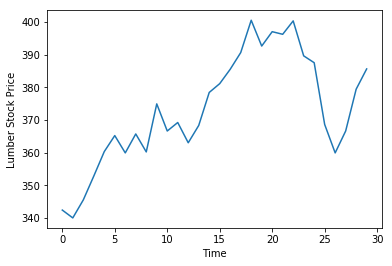

In [180]:
real_stock_price = dataset_test.iloc[:, 1:2].values # ':' before ',' means that we choose all rows... 
                                        #1:2 means that we are going to start excluding 'Date' and stop at 'Price', but not 
                                        #excluding 'Price'
plt.plot(real_stock_price)
plt.xlabel('Time')
plt.ylabel('Lumber Stock Price')
plt.show()
# The X-axis of 0 represents the latest day, whereas 30 is the oldest day. 

# Seeing some predictions

In [170]:
dataset_total = pd.concat((forecast['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)



In [185]:
X_test = []
Y_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_test = np.array(Y_test)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


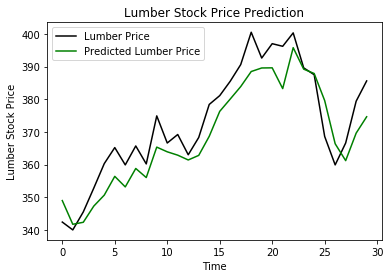

In [176]:
plt.plot(real_stock_price, color = 'black', label = 'Lumber Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Lumber Price')
plt.title('Lumber Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Lumber Stock Price')
plt.legend()
plt.show()

In [186]:
regressor.evaluate(X_test, Y_test) #The value of 0.0003 corresponds to the mean squared error on test set, i.e, the green curve

30/30 [==============================] - 2s 51ms/step


0.0003594537847675383

In [ ]:
Our model was able to predict lumber stock price relatively pretty close with real data.  